In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from collections import Counter
from wordcloud import WordCloud

In [9]:
df = pd.read_csv("processed_data_sample.csv")
print(df['predicted_category'].unique())

[0 3 2 4 1]


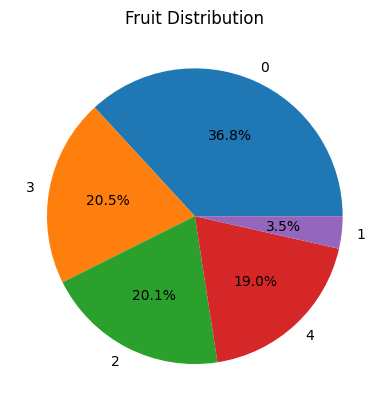

In [11]:
plt.pie(df['predicted_category'].value_counts(), labels=df['predicted_category'].unique(), autopct='%1.1f%%')

# Add a title
plt.title('Predicted category')

# Display the chart
plt.show()

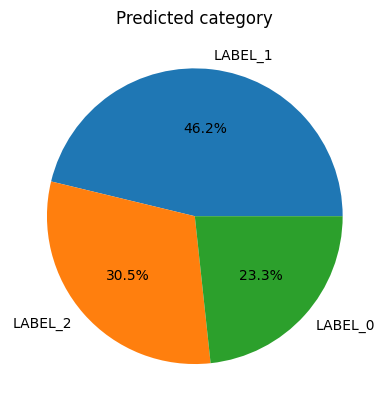

In [12]:
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].unique(), autopct='%1.1f%%')

# Add a title
plt.title('Predicted category')

# Display the chart
plt.show()

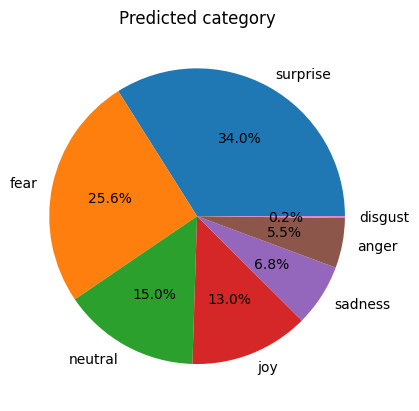

In [13]:
plt.pie(df['emotion'].value_counts(), labels=df['emotion'].unique(), autopct='%1.1f%%')

# Add a title
plt.title('Predicted category')

# Display the chart
plt.show()

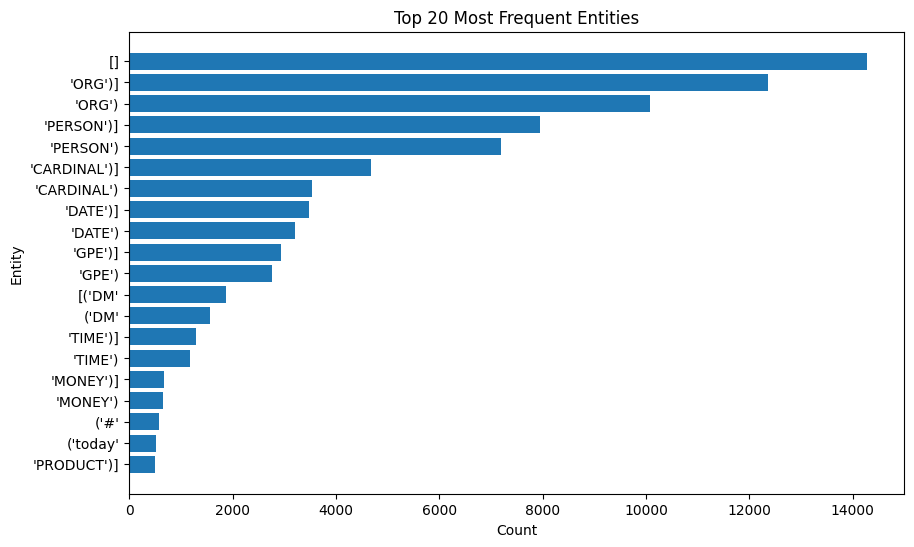

In [22]:
all_entities = []

df['entities'] = df['entities'].fillna("").astype(str)
for ents in df['entities']:
    for e in ents.split(","):
        e = e.strip()
        if e:
            all_entities.append(e)

entity_counts = Counter(all_entities).most_common(20)  # Top 20 entities
entity_labels, entity_values = zip(*entity_counts)

# Bar chart for entities
plt.figure(figsize=(10,6))
plt.barh(entity_labels[::-1], entity_values[::-1])
plt.title("Top 20 Most Frequent Entities")
plt.xlabel("Count")
plt.ylabel("Entity")
plt.show()

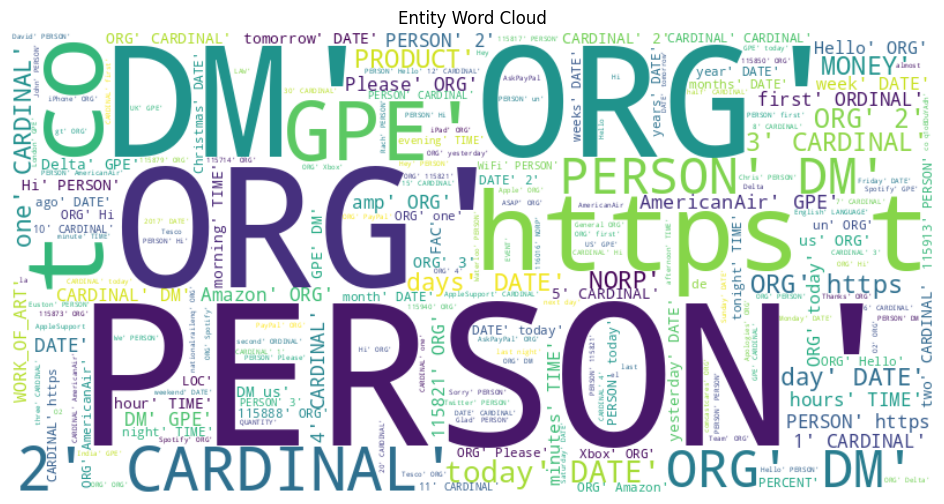

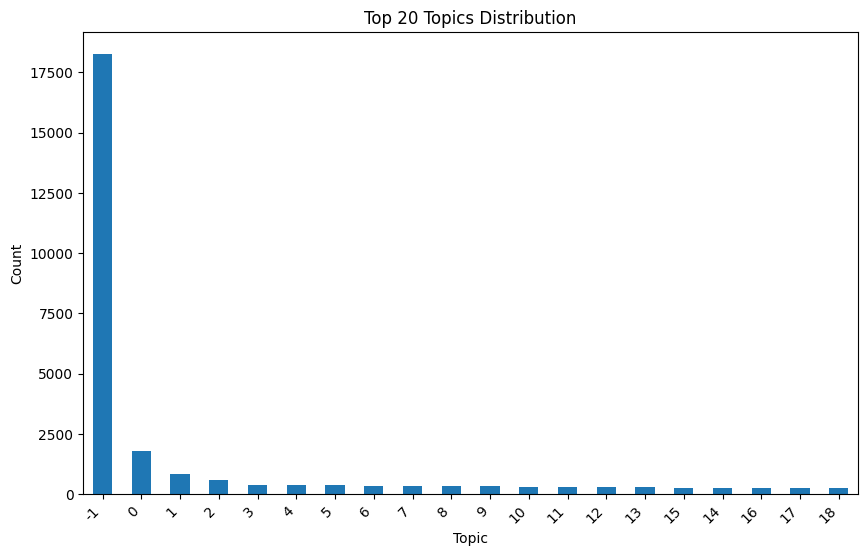

In [25]:
# Word Cloud for entities
entity_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_entities))
plt.figure(figsize=(12,6))
plt.imshow(entity_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Entity Word Cloud")
plt.show()

# --- 2. Topic Distribution ---
topic_counts = df['topic'].value_counts().head(20)  # Top 20 topics

plt.figure(figsize=(10,6))
topic_counts.plot(kind='bar')
plt.title("Top 20 Topics Distribution")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

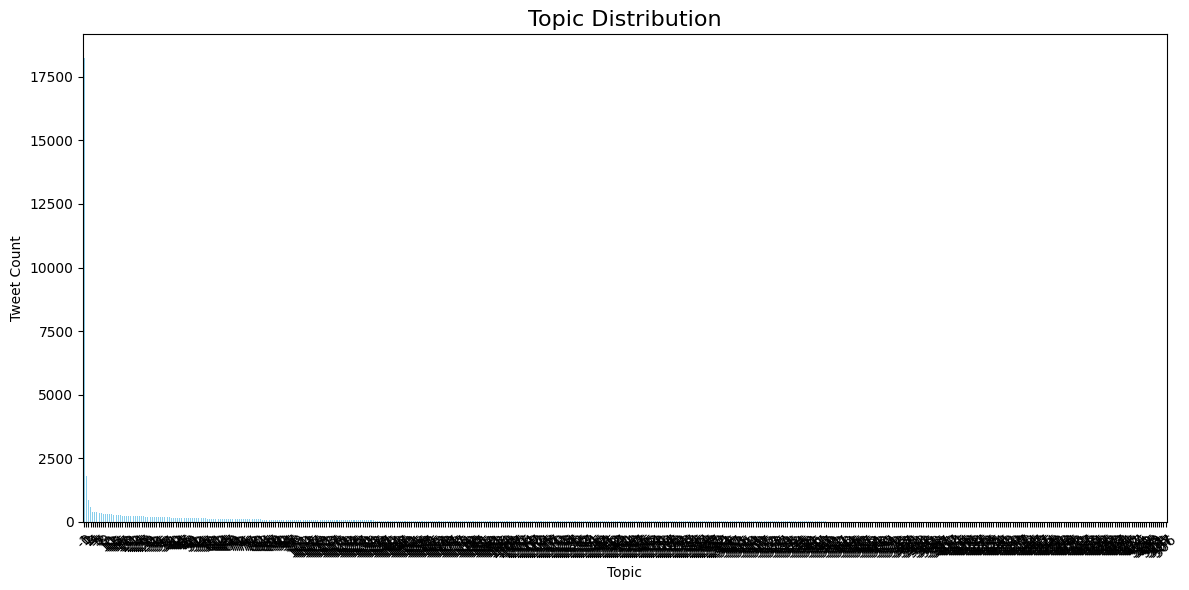

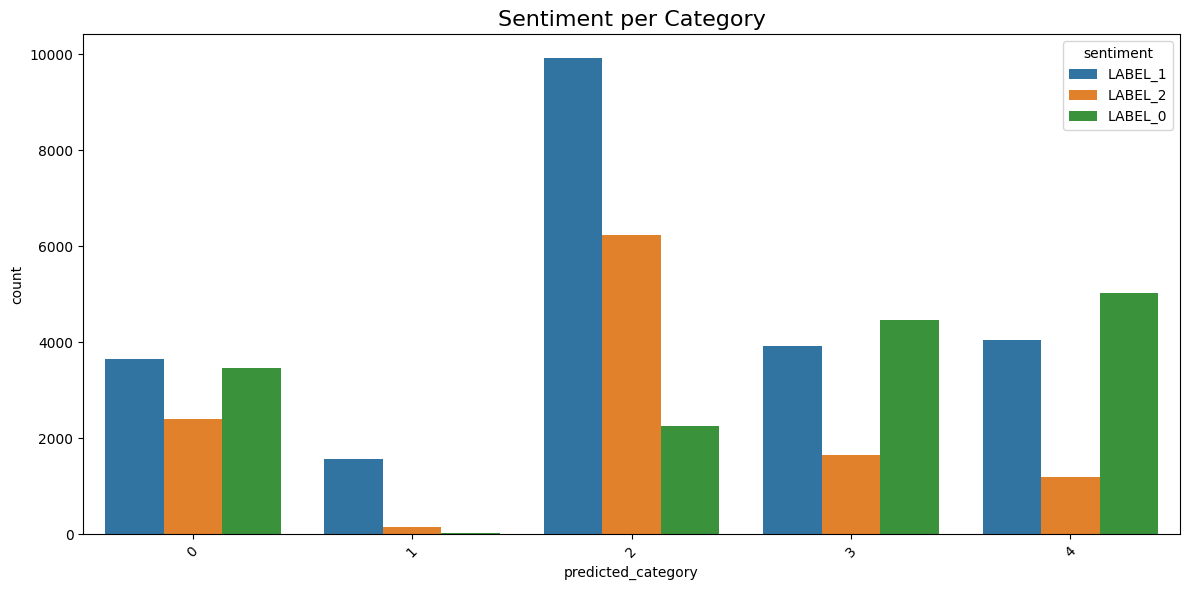

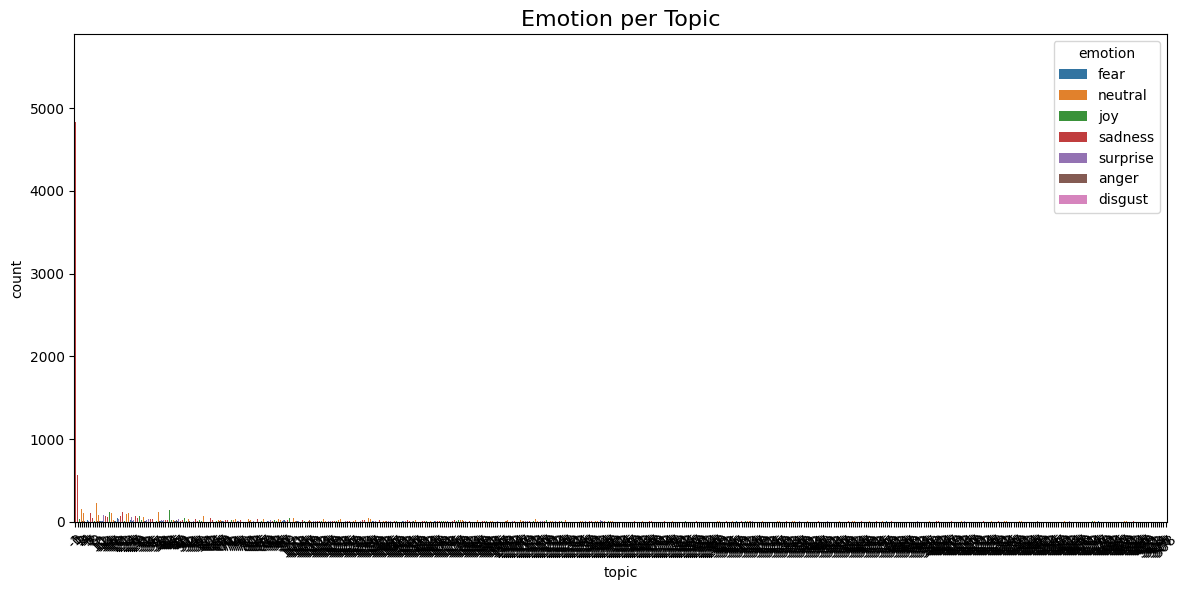

<Figure size 1200x600 with 0 Axes>

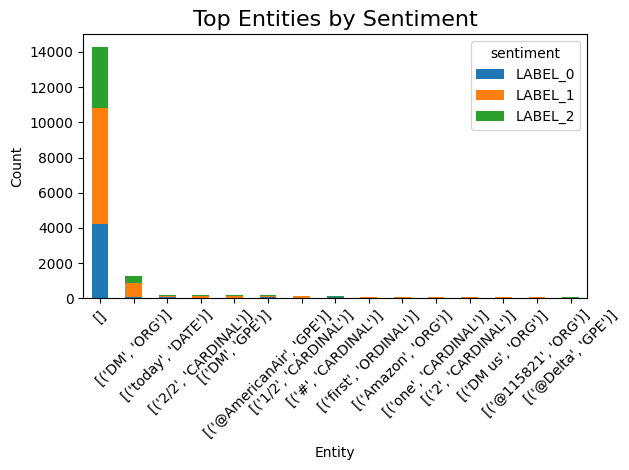

/tmp/ipython-input-3159548579.py:66: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


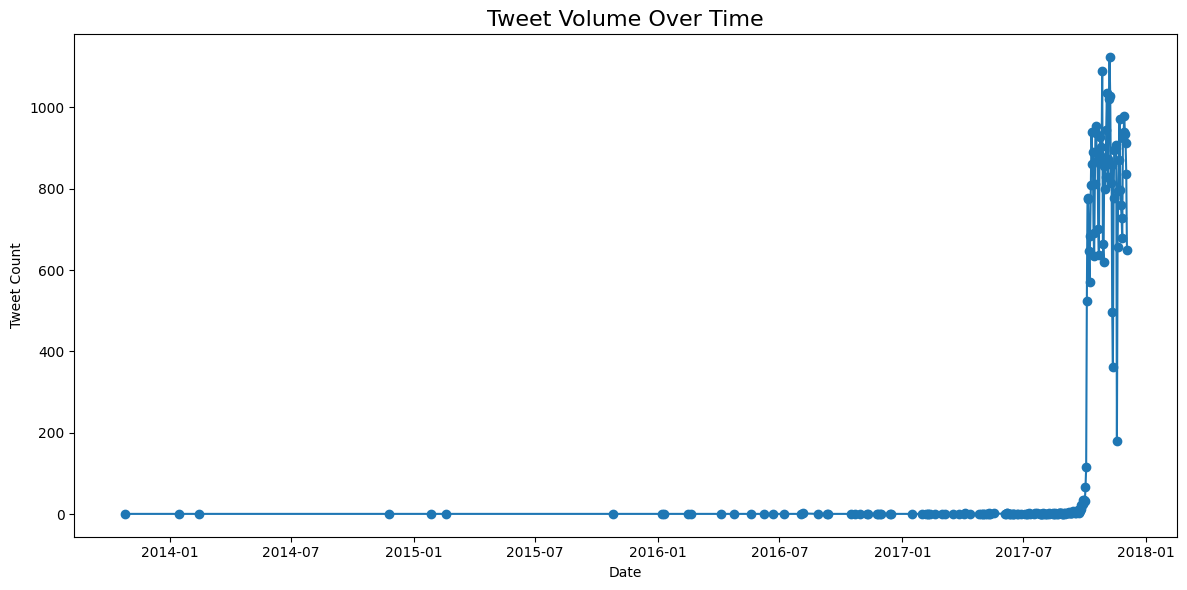

<Figure size 1200x600 with 0 Axes>

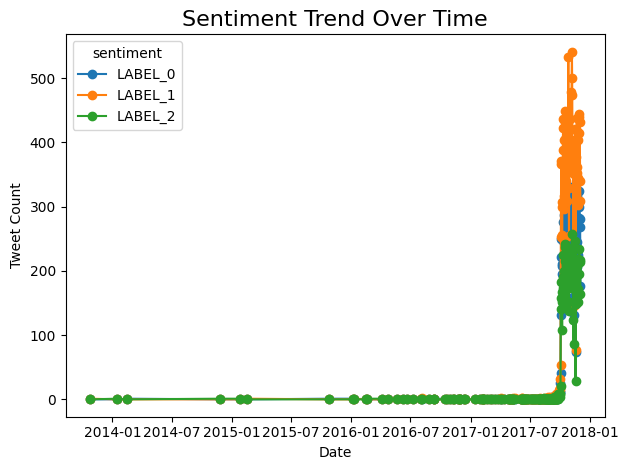

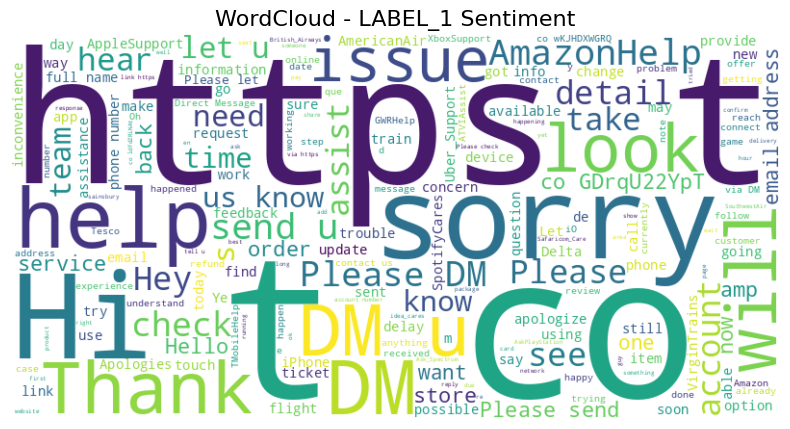

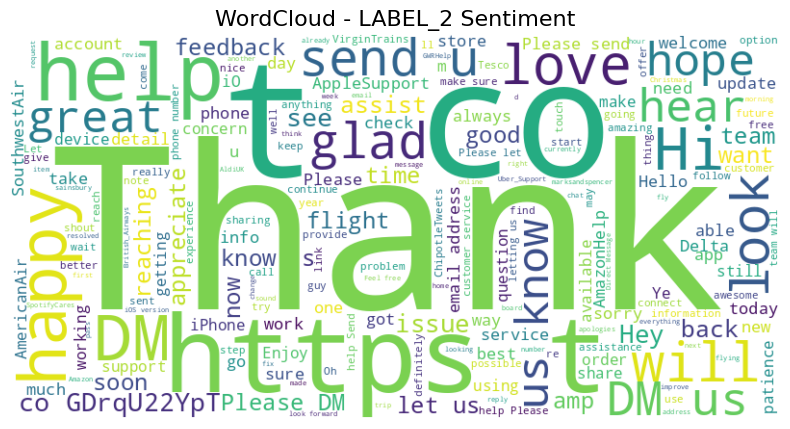

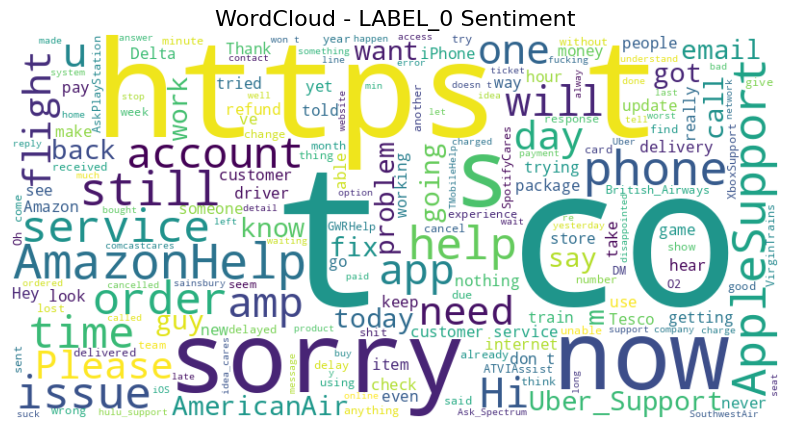

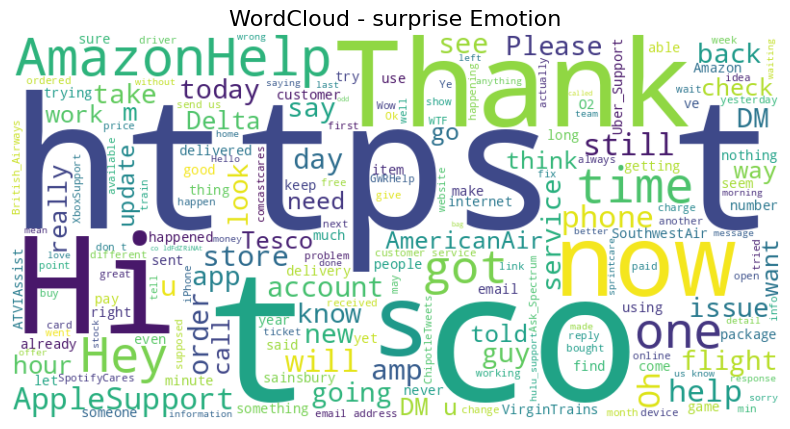

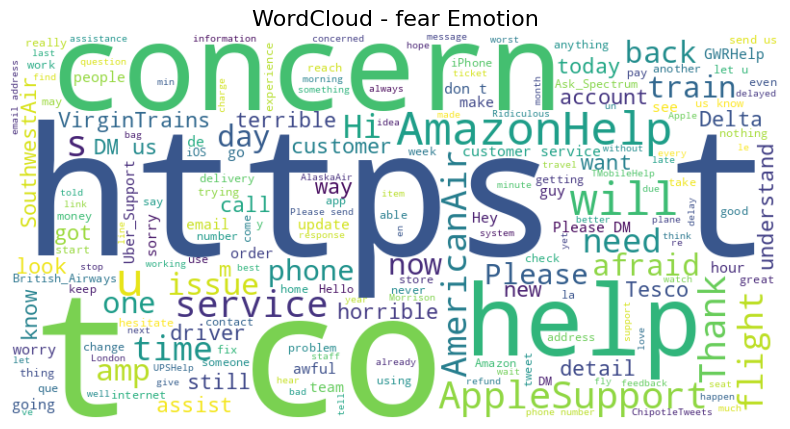

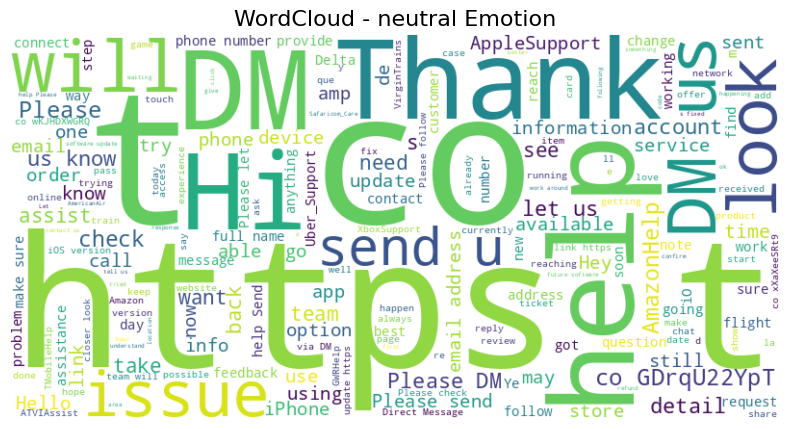

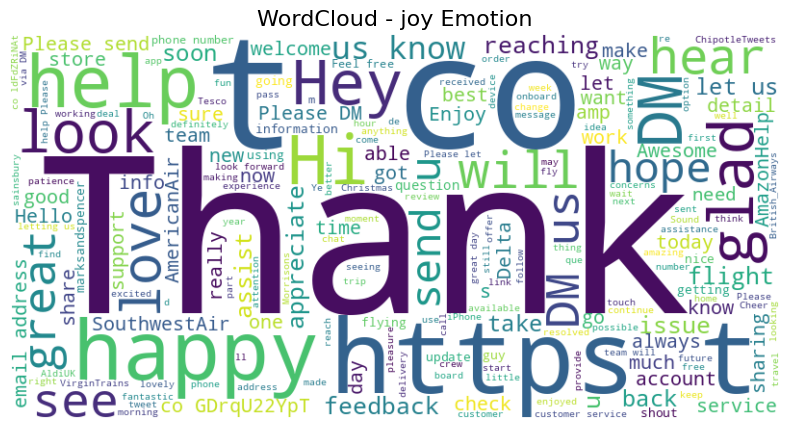

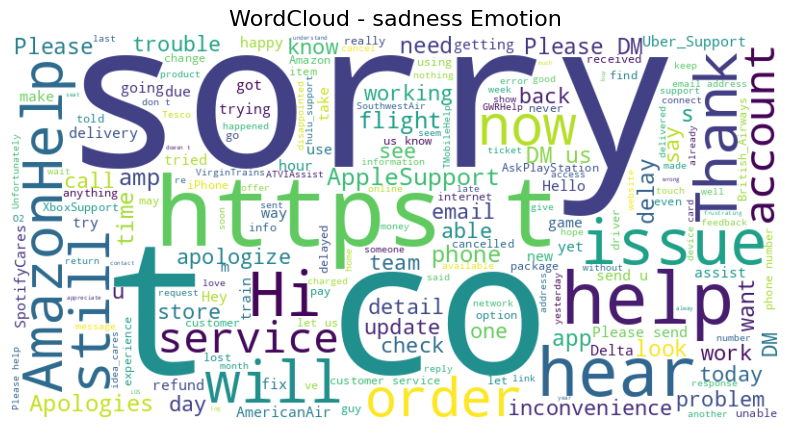

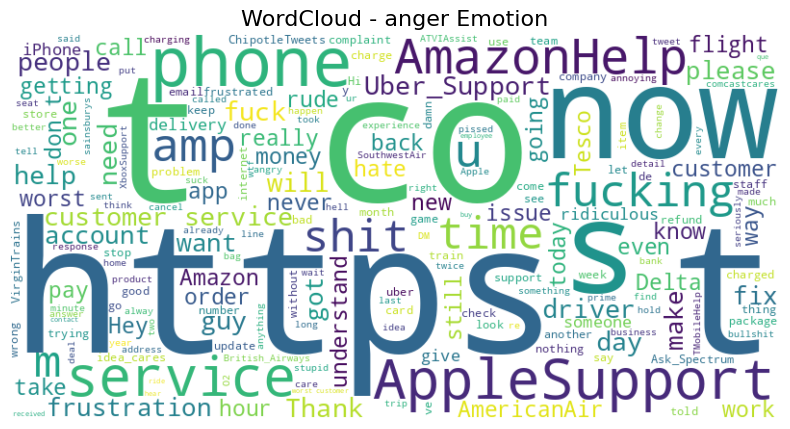

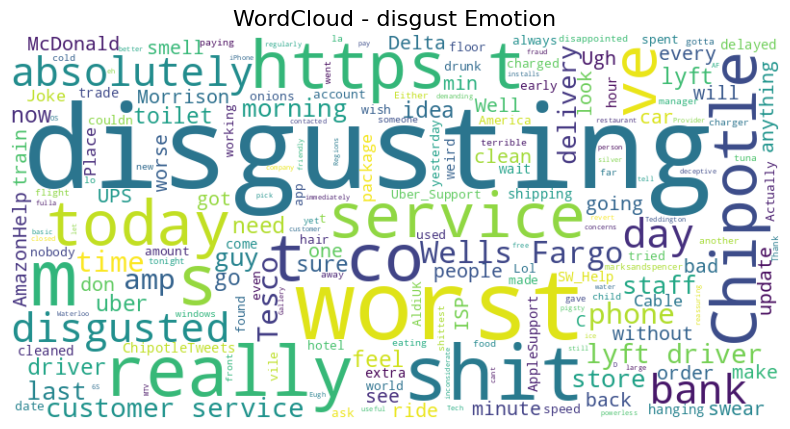

In [26]:
# Phase 3: EDA & Cross Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load processed dataset
df = pd.read_csv("processed_data_sample.csv")

# -------------------------------
# 1. Topic Distribution
# -------------------------------
plt.figure(figsize=(12,6))
df['topic'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Topic Distribution", fontsize=16)
plt.xlabel("Topic")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("topic_distribution.png")
plt.show()

# -------------------------------
# 2. Sentiment per Predicted Category
# -------------------------------
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='predicted_category', hue='sentiment')
plt.title("Sentiment per Category", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sentiment_per_category.png")
plt.show()

# -------------------------------
# 3. Emotion per Topic
# -------------------------------
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='topic', hue='emotion')
plt.title("Emotion per Topic", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("emotion_per_topic.png")
plt.show()

# -------------------------------
# 4. Entities → Brands/Keywords with Sentiment
# -------------------------------
# Flatten entities if multiple per tweet
df['entities'] = df['entities'].astype(str)
entity_sentiment = df.groupby(['entities', 'sentiment']).size().unstack(fill_value=0)
top_entities = entity_sentiment.sum(axis=1).sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
entity_sentiment.loc[top_entities.index].plot(kind='bar', stacked=True)
plt.title("Top Entities by Sentiment", fontsize=16)
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("entities_sentiment.png")
plt.show()

# -------------------------------
# 5. Time-based Trends
# -------------------------------
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['date'] = df['created_at'].dt.date

# Tweets per day
plt.figure(figsize=(12,6))
df.groupby('date').size().plot(kind='line', marker='o')
plt.title("Tweet Volume Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.savefig("tweets_over_time.png")
plt.show()

# Sentiment over time
plt.figure(figsize=(12,6))
df.groupby(['date','sentiment']).size().unstack(fill_value=0).plot(marker='o')
plt.title("Sentiment Trend Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.savefig("sentiment_trend_over_time.png")
plt.show()

# -------------------------------
# 6. Word Clouds for Sentiment/Emotion
# -------------------------------
def plot_wordcloud(subset, title, filename):
    text = " ".join(subset['text'].astype(str))
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.savefig(filename)
    plt.show()

# WordClouds
for sentiment in df['sentiment'].unique():
    plot_wordcloud(df[df['sentiment']==sentiment], f"WordCloud - {sentiment} Sentiment", f"wordcloud_{sentiment}.png")

for emotion in df['emotion'].unique():
    plot_wordcloud(df[df['emotion']==emotion], f"WordCloud - {emotion} Emotion", f"wordcloud_{emotion}.png")


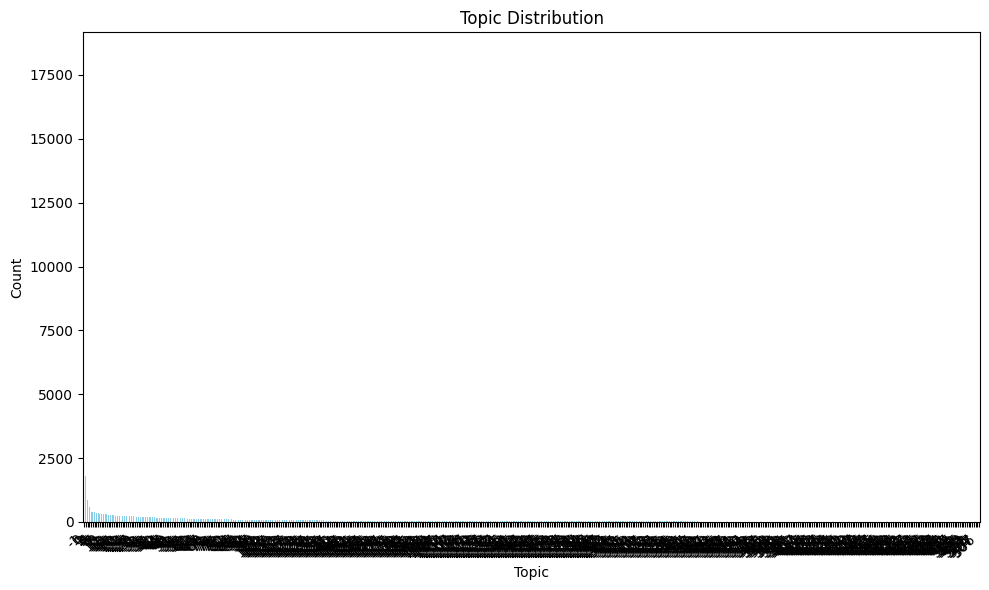

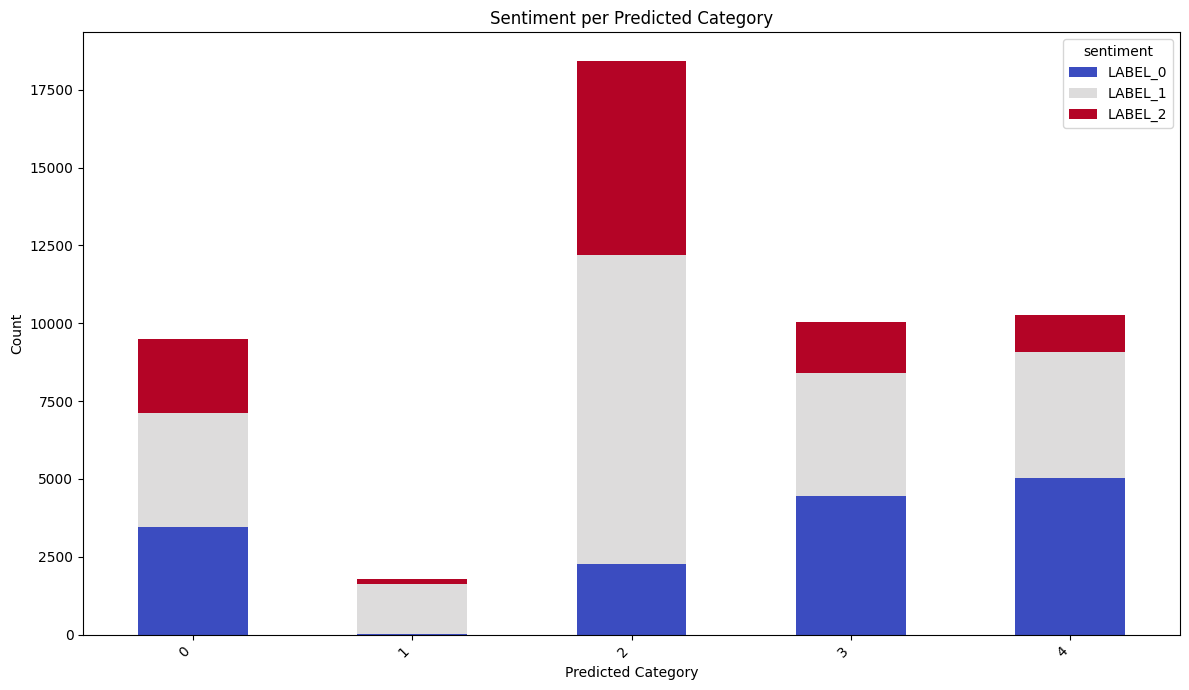

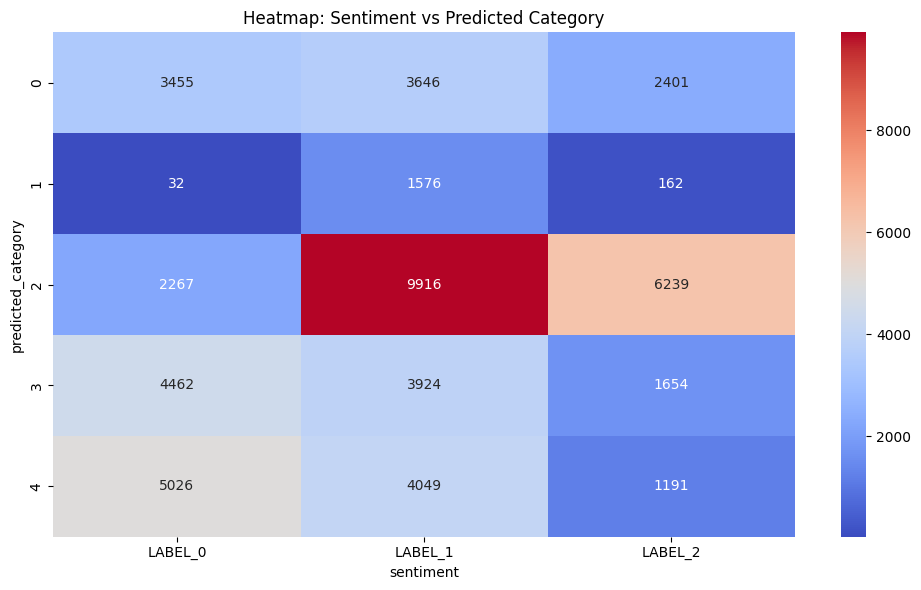

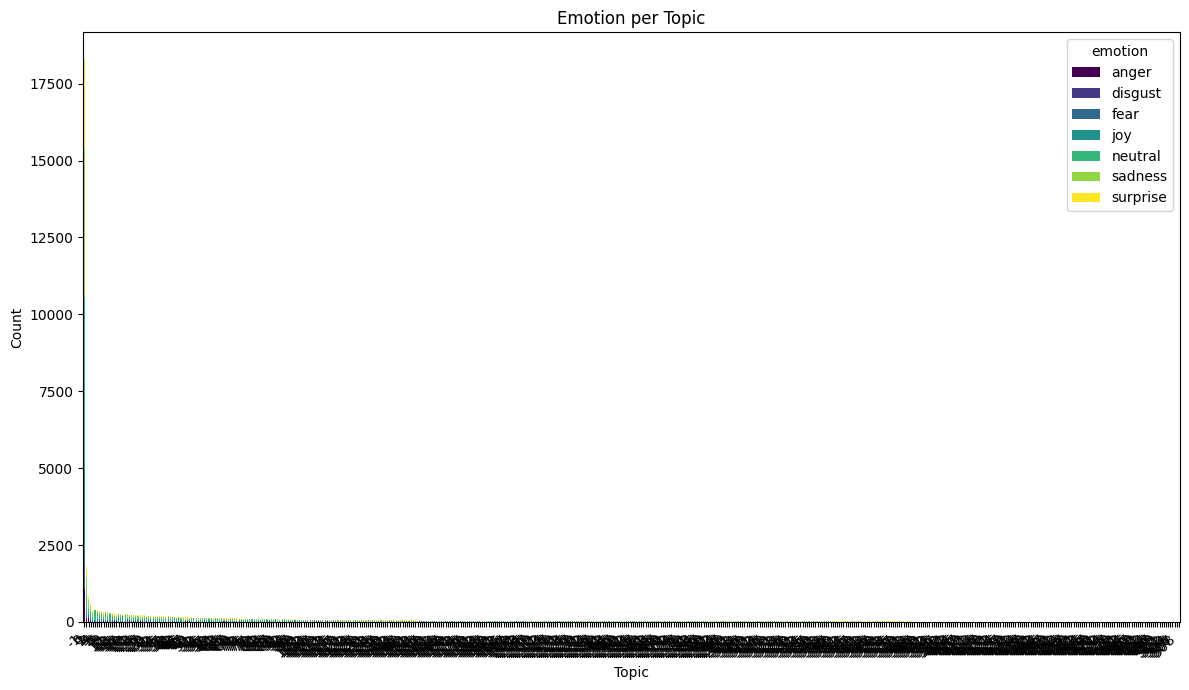

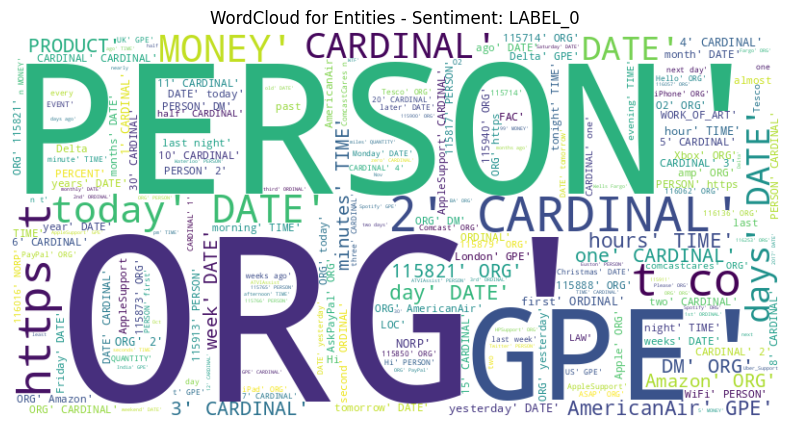

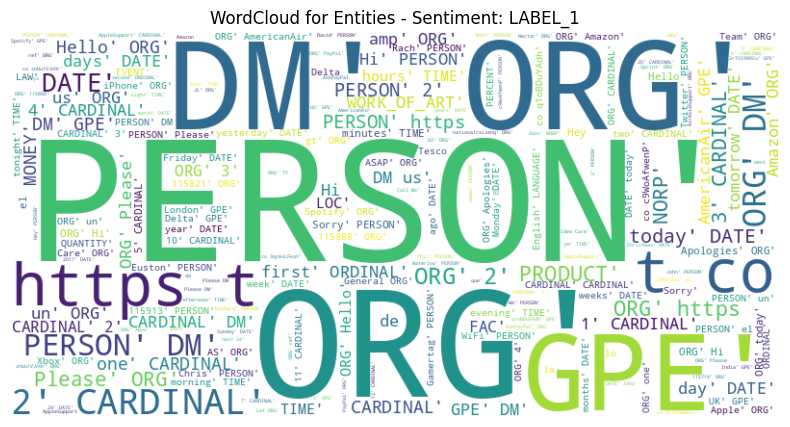

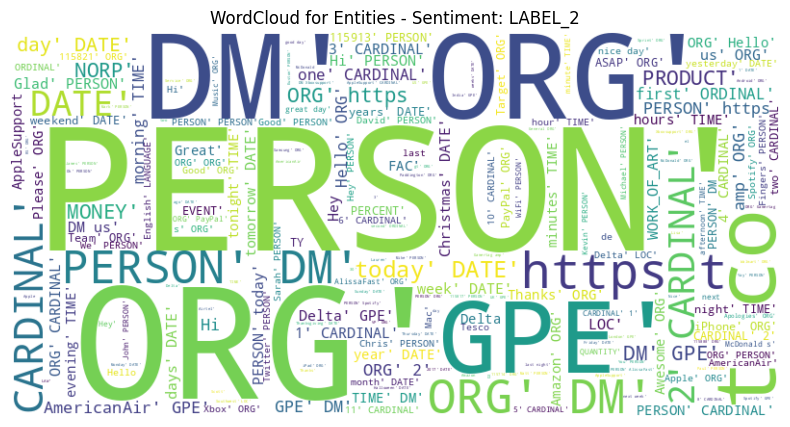

/tmp/ipython-input-3768432665.py:80: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")


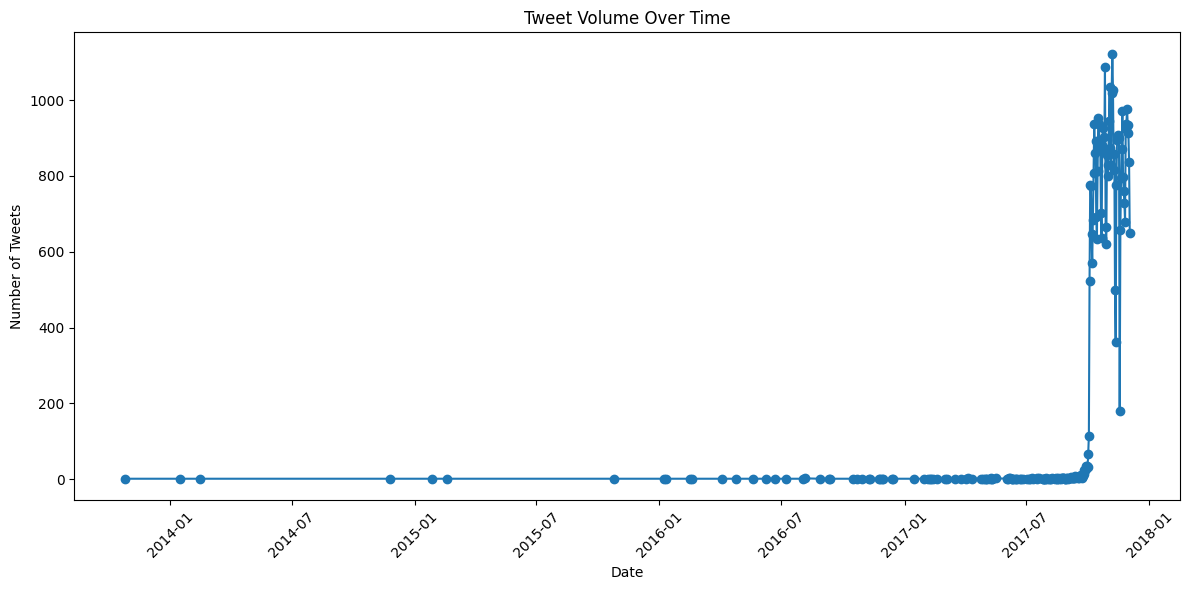

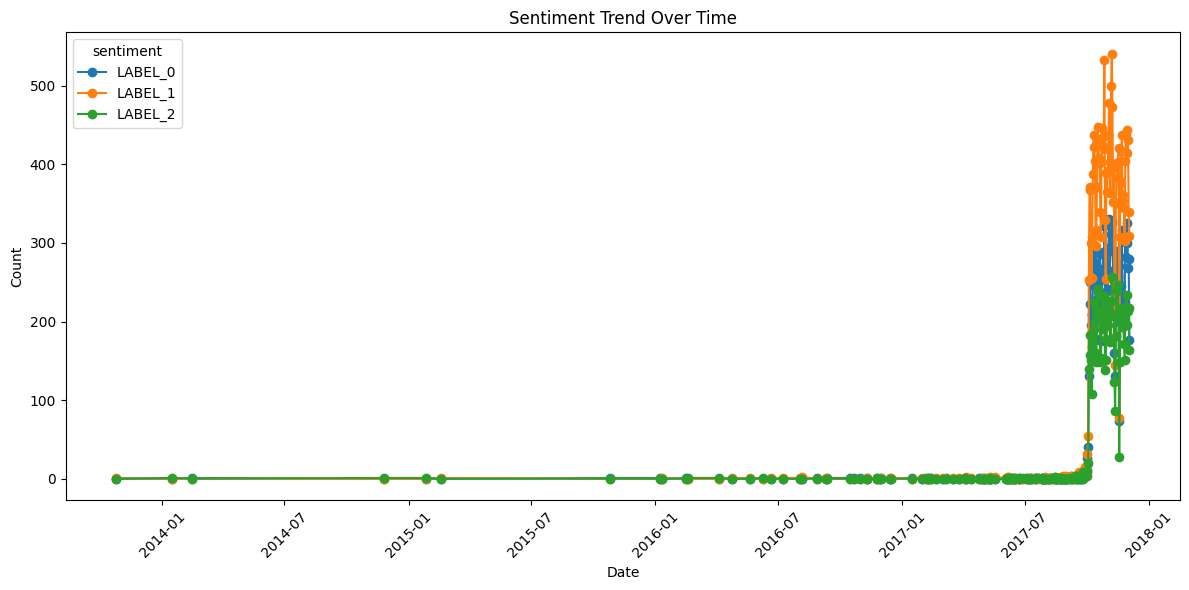

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# ==========================
# Load Data
# ==========================
df = pd.read_csv("processed_data_sample.csv")

# Ensure output folder exists
os.makedirs("eda_outputs", exist_ok=True)

# ==========================
# Topic Distribution
# ==========================
plt.figure(figsize=(10,6))
df['topic'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Topic Distribution")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("eda_outputs/topic_distribution.png")
plt.show()

# ==========================
# Sentiment per Category (Stacked Bar)
# ==========================
sent_cat = pd.crosstab(df['predicted_category'], df['sentiment'])
sent_cat.plot(kind='bar', stacked=True, figsize=(12,7), colormap="coolwarm")
plt.title("Sentiment per Predicted Category")
plt.xlabel("Predicted Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("eda_outputs/sentiment_per_category.png")
plt.show()

# Heatmap for category vs sentiment
plt.figure(figsize=(10,6))
sns.heatmap(sent_cat, annot=True, fmt="d", cmap="coolwarm")
plt.title("Heatmap: Sentiment vs Predicted Category")
plt.tight_layout()
plt.savefig("eda_outputs/sentiment_category_heatmap.png")
plt.show()

# ==========================
# Emotion per Topic (Stacked Bar)
# ==========================
emo_topic = pd.crosstab(df['topic'], df['emotion'])
emo_topic.plot(kind='bar', stacked=True, figsize=(12,7), colormap="viridis")
plt.title("Emotion per Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("eda_outputs/emotion_per_topic.png")
plt.show()

# ==========================
# Entities & Sentiment Association
# ==========================
if "entities" in df.columns:
    entity_sent = df.groupby("sentiment")["entities"].apply(lambda x: " ".join(str(i) for i in x))
    for sentiment, text in entity_sent.items():
        wc = WordCloud(width=800, height=400, background_color="white").generate(text)
        plt.figure(figsize=(10,5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"WordCloud for Entities - Sentiment: {sentiment}")
        plt.savefig(f"eda_outputs/entities_wordcloud_{sentiment}.png")
        plt.show()

# ==========================
# Time-based Trends (if created_at exists)
# ==========================
if "created_at" in df.columns:
    df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
    df = df.dropna(subset=["created_at"])
    df["date"] = df["created_at"].dt.date

    # Tweet volume by day
    plt.figure(figsize=(12,6))
    df["date"].value_counts().sort_index().plot(kind="line", marker="o")
    plt.title("Tweet Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Tweets")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("eda_outputs/tweet_volume_over_time.png")
    plt.show()

    # Sentiment trend over time
    sentiment_time = df.groupby(["date", "sentiment"]).size().unstack(fill_value=0)
    sentiment_time.plot(kind="line", marker="o", figsize=(12,6))
    plt.title("Sentiment Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("eda_outputs/sentiment_trend_over_time.png")
    plt.show()

# ==========================
# WordClouds for Sentiment & Emotion
# ==========================
# WordCloud for each sentiment
for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment']==sentiment]['topic'].astype(str))
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for Sentiment: {sentiment}")
    plt.savefig(f"eda_outputs/wordcloud_sentiment_{sentiment}.png")
    plt.show()

# WordCloud for each emotion
for emotion in df['emotion'].unique():
    text = " ".join(df[df['emotion']==emotion]['topic'].astype(str))
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for Emotion: {emotion}")
    plt.savefig(f"eda_outputs/wordcloud_emotion_{emotion}.png")
    plt.show()
